# Credit Card Users 

### Understanding if sociodemograhpic factors such as age, marital status, employment status, education, and income impact if people use credit cards


## Introduction

Credit cards have become something most of us use in our daily lives from day-to-day purchases to setting up recurring payments. In this assignment, I wanted to see if certain sociodemagraphic factors have an impact on using a credit card. Credit cards have been around for many years now and they provide great services and benefits to the holder such as insurance on large purchases,the benefit of being able to spread out a large purchase over time, allowing the holder to build their credit score by simply using and paying off the bill each cycle, etc. I got this dataset from Kaggle, it shows a number of credit card users and their various data, mainly sociodemographic data, which had been collected by some bank. Understanding this I wanted to explore if various sociodemographic factors such as age, marital status, employment status, education, and income impact if people use credit cards.

## Data Preparation
### Collection

In [24]:
#Import data
#import matplotlib as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [25]:
applicants = pd.read_csv('application_record.csv')

### Cleaning

The dataset had some unclear column names so I renamed those. I also removed some columns that I did not use in my analyses for clairity. I also converted the age values to actual numbers instead of days.

In [26]:
#rename columns
applicants.columns = ["Client Number", "Gender","Owns a Car","Owns a property","Number of Children","Annual Income","Employment Status","Educational Level", "Marital Status","Housing Type","Age","Start Date of Employment","Mobile Phone", "Work Phone","Phone","Email","Occupation","Family Size"]

#checks the number of unique value in each column
applicants.nunique()


Client Number               170232
Gender                           2
Owns a Car                       2
Owns a property                  2
Number of Children              10
Annual Income                  532
Employment Status                5
Educational Level                5
Marital Status                   5
Housing Type                     6
Age                          14289
Start Date of Employment      6835
Mobile Phone                     1
Work Phone                       2
Phone                            2
Email                            2
Occupation                      18
Family Size                     11
dtype: int64

In [27]:
#drops unused columns
applicants = applicants.drop(['Gender','Owns a Car','Owns a property','Number of Children','Housing Type','Start Date of Employment','Mobile Phone', 'Work Phone','Phone','Email','Occupation','Family Size'], axis= 1)


In [28]:
applicants

,Client Number,Annual Income,Employment Status,Educational Level,Marital Status,Age
0,5008804,427500.0,Working,Higher education,Civil marriage,-12005
1,5008805,427500.0,Working,Higher education,Civil marriage,-12005
2,5008806,112500.0,Working,Secondary / secondary special,Married,-21474
3,5008808,270000.0,Commercial associate,Secondary / secondary special,Single / not married,-19110
4,5008809,270000.0,Commercial associate,Secondary / secondary special,Single / not married,-19110
...,...,...,...,...,...,...
170227,5804580,144000.0,Working,Secondary / secondary special,Separated,-13455
170228,5804581,225000.0,Commercial associate,Higher education,Married,-16610
170229,5804583,180000.0,Pensioner,Secondary / secondary special,Widow,-21833
170230,5804585,180000.0,Pensioner,Secondary / secondary special,Widow,-21833


In [29]:

#converts the days since birth data to their age
def replace_age(x):
    #int used as a floor function here
    return int(abs(x/365))

#applys it to the age function
applicants['Age'] = applicants['Age'].apply(replace_age)


In [30]:

applicants

,Client Number,Annual Income,Employment Status,Educational Level,Marital Status,Age
0,5008804,427500.0,Working,Higher education,Civil marriage,32
1,5008805,427500.0,Working,Higher education,Civil marriage,32
2,5008806,112500.0,Working,Secondary / secondary special,Married,58
3,5008808,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52
4,5008809,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52
...,...,...,...,...,...,...
170227,5804580,144000.0,Working,Secondary / secondary special,Separated,36
170228,5804581,225000.0,Commercial associate,Higher education,Married,45
170229,5804583,180000.0,Pensioner,Secondary / secondary special,Widow,59
170230,5804585,180000.0,Pensioner,Secondary / secondary special,Widow,59


## Analyses
I will explore the relationship between sociodemographic factors such as age, marital status, employment status, education, and income on using a credit card with exploratory analyses, Using summaries and visualisations.

### Distributions
I will start by exploring distributions in credit card user data. Figure below shows the distribution of ages of credit card users. As we can see most credit card user are in the age range of 25-65.

C:\Users\cajja\AppData\Local\Temp\ipykernel_6616\2439374002.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Ages_plot = sns.distplot(applicants['Age'],kde= False, bins= 10,color= 'blue').set(title = 'Ages of Credit Card Users', xlabel = "Age", ylabel = "Number of Users")


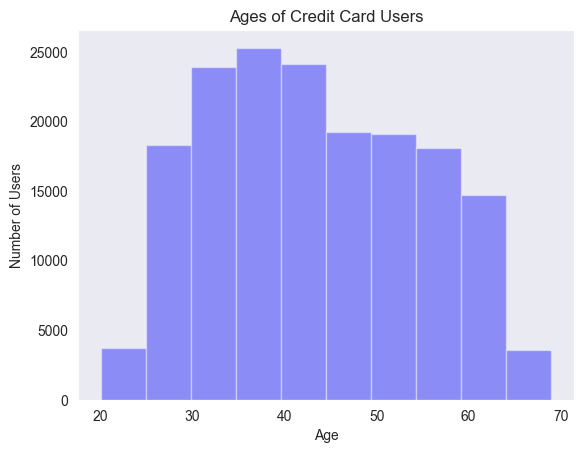

In [31]:
#coded the plot with with extra feature to provide clairity in the histogram
Ages_plot = sns.distplot(applicants['Age'],kde= False, bins= 10,color= 'blue').set(title = 'Ages of Credit Card Users', xlabel = "Age", ylabel = "Number of Users")
# set style to dark
Ages_plot = sns.set_style("dark")


A descriptive analysis of credit card user ages shows the majority of credit card user ages ranged from 25-65, an interesting detail is it seem there wasn't nearly as many users aged 20-25 and 65 or older.

In [32]:
#descriptive statistics of ages

#checking if dist is a right skew
mean_age = round(np.mean(applicants["Age"]),2)
median_age = np.median(applicants["Age"])
#checking to make sure graph makes sense
max_age = np.max(applicants['Age'])
min_age = np.min(applicants['Age'])
#prints values
print(f'Mean Age: {mean_age}')
print(f'Median Age: {median_age}')
print(f'Max Age: {max_age}')
print(f'Min Age: {min_age}')

Mean Age: 43.38
Median Age: 42.0
Max Age: 69
Min Age: 20


Figure below shows the maritial status's of credit card users, it shows that the majority of credit users are married. 

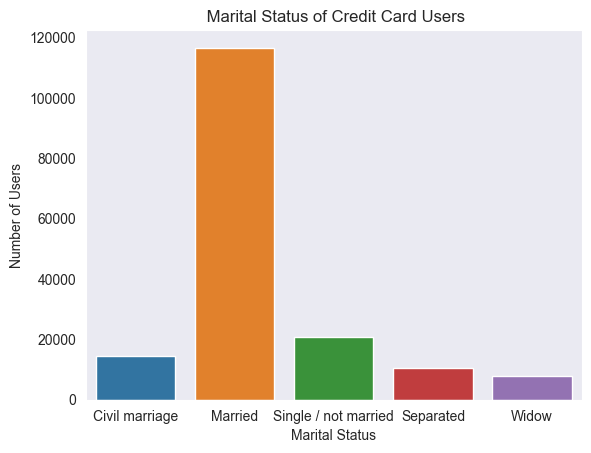

In [33]:
Marital_Status_plot = sns.countplot(x = applicants['Marital Status'])
#sets labels
Marital_Status_plot = Marital_Status_plot.set(title= " Marital Status of Credit Card Users",xlabel = "Marital Status", ylabel="Number of Users")
#sets theme
Marital_Status_plot= sns.set_style("dark")


Figure below shows the various education levels of the credit card users. It shows that the vast majority of credit card users have  a secondary or special secondary school education with significant amount of users having a higher education.

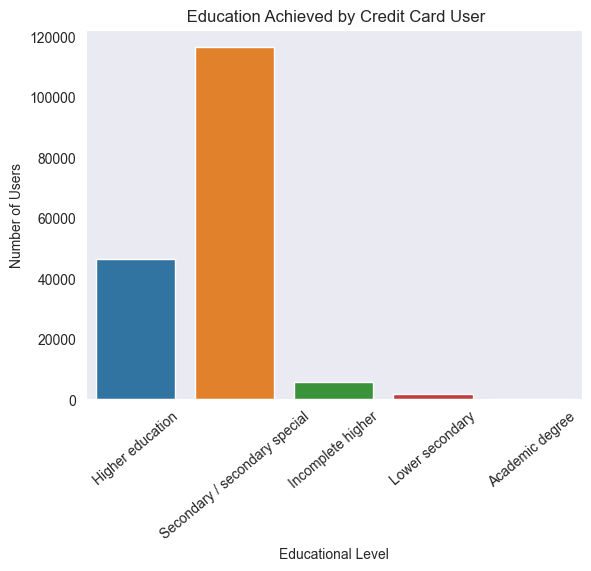

In [34]:
Education_plot = sns.countplot(x = applicants['Educational Level'])
#angles labels on x axis
Education_plot.set_xticklabels(Education_plot.get_xticklabels(),rotation = 40, size = 10)
#sets labels
Education_plot = Education_plot.set(title= " Education Achieved by Credit Card User",xlabel = "Educational Level", ylabel="Number of Users")
#sets theme
Education_plot = sns.set_style("dark")

Figure below shows the employment status of credit card users. It shows that the majority of credit card users have  employment statsus of working

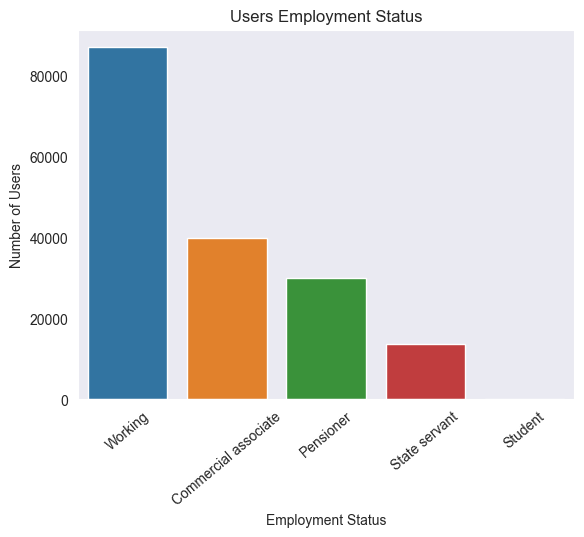

In [35]:
Employment_Status_plot = sns.countplot(x = applicants['Employment Status'])
#angles labels on x axis
Employment_Status_plot.set_xticklabels(Employment_Status_plot.get_xticklabels(),rotation = 40, size = 10)
#sets labels
Employment_Status_plot = Employment_Status_plot.set(title= "Users Employment Status",xlabel = "Employment Status", ylabel="Number of Users")
#sets style to dark
Employment_Status_plot = sns.set_style('dark')

Figure below shows the various incomes of credit card users. The distribution seems to have a right skew meaning that the majority of users income range is in between $100000 - $260000.

27000.0


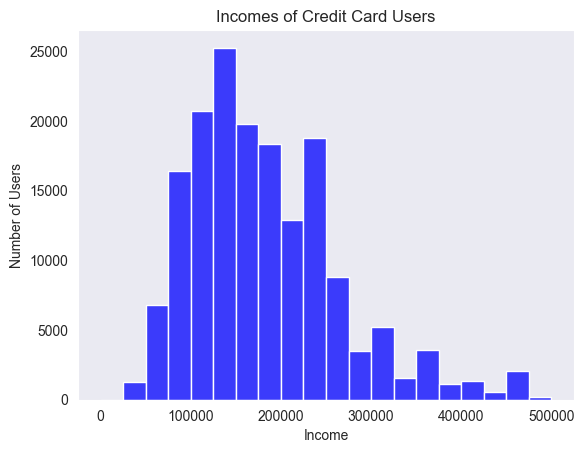

In [36]:
#used to make sure graph plotted correctly
min_income = np.min(applicants['Annual Income'])
print(min_income)
Income_plot = sns.histplot(applicants['Annual Income'],kde= False, bins= 20,color= 'blue', binrange=(0,500000)).set(title = 'Incomes of Credit Card Users', xlabel = "Income", ylabel = "Number of Users")

Table below shows a summary of user's education and employment status. There seems to be a very small amount of users with an academic degree.

In [37]:
#groups the education level data and the employment status data
grouped_applicants = applicants.groupby(['Educational Level','Employment Status']).size().unstack()
# replaces any na values with 0
grouped_applicants.fillna(0,inplace=True)

grouped_applicants

Employment Status,Commercial associate,Pensioner,State servant,Student,Working
Educational Level,,,,,
Academic degree,37.0,9.0,10.0,0.0,60.0
Higher education,14259.0,4991.0,6074.0,11.0,20920.0
Incomplete higher,1892.0,311.0,429.0,0.0,3199.0
Lower secondary,190.0,669.0,62.0,0.0,709.0
Secondary / secondary special,23360.0,23884.0,7096.0,3.0,62057.0


Figure below shows a summary of users and their education and employment status. It work appear that the majority of credit card user have a sceondary/secondary special education and have an employment status of working. Once again it also shows there is a very little amount of users with an academic degree

[Text(0.5, 1.0, 'Employment Status and Education of Users'),
 Text(0.5, 0, 'Income'),
 Text(0, 0.5, 'Number of Users')]

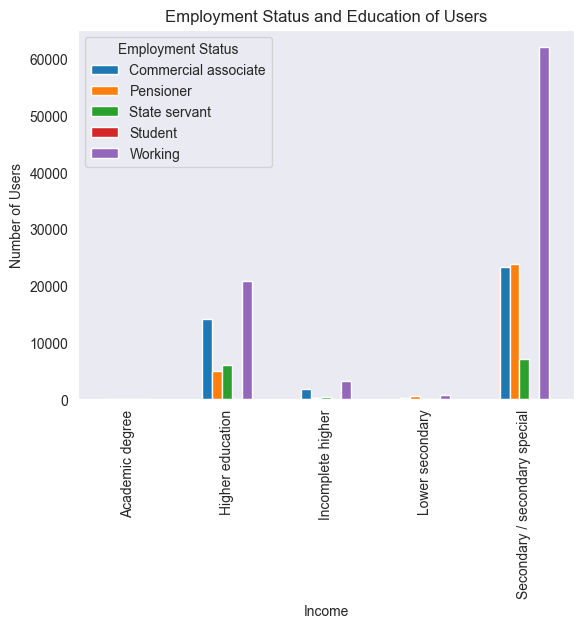

In [38]:
#plots a bar chart of grouped data
grouped_applicants.plot.bar().set(title = 'Employment Status and Education of Users', xlabel = "Income", ylabel = "Number of Users",)

## Discussion

In this assignment, I explored data of credit card users from a bank. I focused on the relationship between various sociodemographic factors such as age, marital status, employment status, education, and income on being a credit card user. Want to determine if most credit card users fall under specific sociodemographic factors and what insights that reveals. An exploratory analysis found that certain sociodemographic factors indeed do have an impact on using a credit card. I found that most credit card users are in the age range of 25-65 but I did notice there was only a very small portion of 20-25 and 65-70 years old using credit cards. This may mean that they may not be too worried about building their credit up or may not be as informed as other age groups people of the benefits of credit cards or in the case of the 65-70 years they may have stopped using or not gotten credit cards not wanting to take on more debt later in life. I also noticed that the majority of credit card users are married, this may mean that they may have a family to support meaning they may have a credit card for added financial security. Furthermore, it seems that the majority of credit card users have a secondary/secondary special education, this may mean people with less education than that may not be as informed about credit cards or may not be able to get one. A look at the employment status of credit card users says the majority have a working employment status, interestingly there are very few students with credit cards, this may mean that students may be wary of taking on more debt as many students take out loans to pay for school or there may simply not be many credit cards tailored for students. Finally, it seems the majority of credit card user's incomes fall in the range of $100000 - $260000 per year, it also seems that there is a right skew in our distribution meaning that the higher the income the fewer credit card users we have in our data, this may mean that people with higher incomes may not need a credit card as much as people with lower incomes or that this bank doesn't cater to that income demagraphic. Interestingly we also see that the majority of users have a secondary/secondary special education and are working class. These outcomes tell us that the majority of credit users are between the ages of 25-65, married, have a secondary/secondary special education, working class, and have an income between $100000 - $260000. These analyses show that there is a relationship between sociodemographic factors and having a credit card. This information may be useful for the bank to consider when thinking about who to advertise their credit cards too. As well as where they may be able to search for new clients, this being people like students, people with less financial literacy who do not know about or aren't able to get approved for credit cards, and  people who are of higher income. 

## References

1. Source data: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=credit_record.csv
2. Matplotlib for data vizulization
3. Seaborn for data vizulization
4. Pandas for data manipulation
5. Sci-Kit Learn for Linear Regression
